"""
Date: 2022-10-01
Author: Martin Loza
Name: First test on mcool files
"""

On this notebook I will test the mcool files and the cooltools package to import them and explore them


In [4]:
import cooler
import matplotlib.pyplot as plt
import pandas as pd
import h5py

#Global variables
date = 231208
seed = 777
in_dir = "/Volumes/MARTIN_LOZA/Projects/HK_Interactions/Data/HiC/SRA/mcool/"
our_dir = "~/Documents/Projects/HK_Interactions/Analysis/2023_12_12/Results/"

ValueError: The number of FixedLocator locations (46), usually from a call to set_ticks, does not match the number of ticklabels (23).

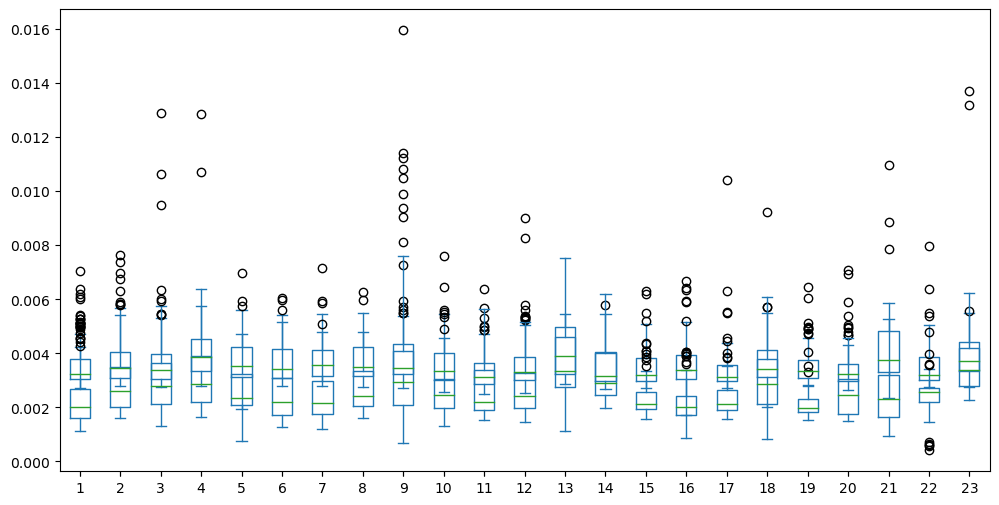

In [6]:
# Define the list of mcool files for the 5 cell types
mcool_files = [
    in_dir + "GM12878-HindIII-allReps-filtered.mcool",
    in_dir + "K562-HindIII-allReps-filtered.mcool",
    in_dir + "KBM7-HindIII-allReps-filtered.mcool",
    in_dir + "IMR90-HindIII-allReps-filtered.mcool",
    in_dir + "HUVEC-HindIII-allReps-filtered.mcool"
]

# Select a resolution
res = 1000000

# Create an empty list to store the weights data frames for each cell type
weights_dfs = []

# Iterate over each mcool file
for mcool_file in mcool_files:
    
    # Get the cooler object for the selected resolution
    tcooler_res = cooler.Cooler(mcool_file + "::resolutions/" + str(res))

    # Get the unique chromosomes in the tcooler_res object
    chromosomes = tcooler_res.chromnames

    # Create an empty list to store the weights for each chromosome
    weights_list = []

    # Iterate over each chromosome
    for chromosome in chromosomes:
        # Get the weight column for the current chromosome
        weights = tcooler_res.bins().fetch(chromosome)['weight']

        # Append the weights to the list
        weights_list.append(weights)

    # Convert the weights list to a data frame
    weights_df = pd.DataFrame(weights_list, index=chromosomes).T

    # Append the weights data frame to the list
    weights_dfs.append(weights_df)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each cell type and plot the weights for each chromosome
for i, weights_df in enumerate(weights_dfs):
    weights_df.plot.box(ax=ax, label="Cell Type " + str(i+1))

plt.title("Boxplot of Weight Distribution for All Chromosomes. Resolution = " + str(res) + " bp")
plt.xlabel("Chromosome")
plt.ylabel("Weight")
plt.legend()
plt.show()
